In [1]:
import os
import sys
sys.path.append(os.getcwd() + '/../vic3analyze')

In [2]:
from database import get_db
from sqlalchemy.orm import Session
from sqlalchemy.sql import text

db = get_db('15_year_runs.db')

In [3]:
from tables.country_basics import CountryBasics
from tables.market_goods import MarketGoods
from tables.metadata import RunMetadata, SampleMetadata

from sqlalchemy import select
import pandas as pd

In [4]:
df = pd.read_sql(select(RunMetadata).join(SampleMetadata), db.connect())
df.groupby(['id']).size()

id
1640e885-55d5-4a4b-86ac-bbef6fe84fb0    177
2a87bce1-ead1-474a-a5b4-59620dd90ea7    178
722d1180-146e-43ae-844f-1873a79331f6    179
a109bd26-644c-4fde-a3c8-b2eb26d249e9    180
bf47eb93-43c0-4384-b384-9c84920b99e1    177
c83069ed-2293-488c-9e17-2584dbc798f9    179
eaf4bab9-b3a5-41ef-8ac8-8db0d263b261     34
dtype: int64

In [11]:



stmt = (
    select(CountryBasics)
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA', 'JAP')))
)
countries = pd.read_sql(stmt, db.connect())
stmt = (
    select(MarketGoods, CountryBasics)
    .where(MarketGoods.run_id != 'eaf4bab9-b3a5-41ef-8ac8-8db0d263b261')
    .where(MarketGoods.good_id == 'engines')
    .join(MarketGoods.owner_country)
    #.where(MarketGoods.good_id.in_(('steel', 'iron', 'coal', 'engines')))
    .where(CountryBasics.tag.in_(('GBR', 'FRA', 'PRU', 'RUS', 'AUS', 'USA')))
    #.where(CountryBasics.tag == 'GBR')
)
markets = pd.read_sql(stmt, db.connect())


,run_id,game_date,tag,buildings_demand,buildings_supply
0,2a87bce1-ead1-474a-a5b4-59620dd90ea7,1836-02-01,GBR,265.7,342.4
1,2a87bce1-ead1-474a-a5b4-59620dd90ea7,1836-02-01,GBR,265.7,342.4
2,2a87bce1-ead1-474a-a5b4-59620dd90ea7,1836-02-01,GBR,265.7,342.4
3,2a87bce1-ead1-474a-a5b4-59620dd90ea7,1836-02-01,GBR,265.7,342.4
4,2a87bce1-ead1-474a-a5b4-59620dd90ea7,1836-02-01,GBR,265.7,342.4
...,...,...,...,...,...
4744987,bf47eb93-43c0-4384-b384-9c84920b99e1,1851-02-01,USA,0.0,0.0
4744988,bf47eb93-43c0-4384-b384-9c84920b99e1,1851-02-01,USA,0.0,0.0
4744989,bf47eb93-43c0-4384-b384-9c84920b99e1,1851-02-01,USA,0.0,0.0
4744990,bf47eb93-43c0-4384-b384-9c84920b99e1,1851-02-01,USA,0.0,0.0


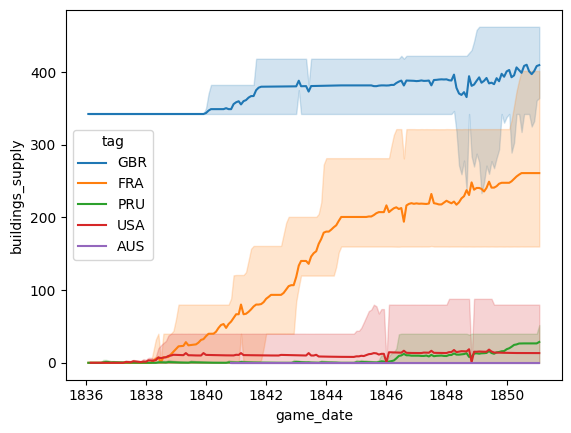

In [15]:
import seaborn
mk_limited = markets[['run_id','game_date','tag','buildings_demand', 'buildings_supply']]
#mk2 = markets.groupby(['good_id', 'game_date', 'run_id']).sum(numeric_only=True)
#mk3 = mk2.groupby(['good_id', 'game_date']).mean()


#seaborn.lineplot(countries, x='game_date', y='prestige', hue='tag')
#eaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="ci")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="pi")
seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="pi")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="se")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', errorbar="sd")
#seaborn.lineplot(mk_limited, x='game_date', y='buildings_supply', hue='tag', units='run_id', estimator=None)
mk_limited

<AxesSubplot: xlabel='game_date', ylabel='credit_limit'>

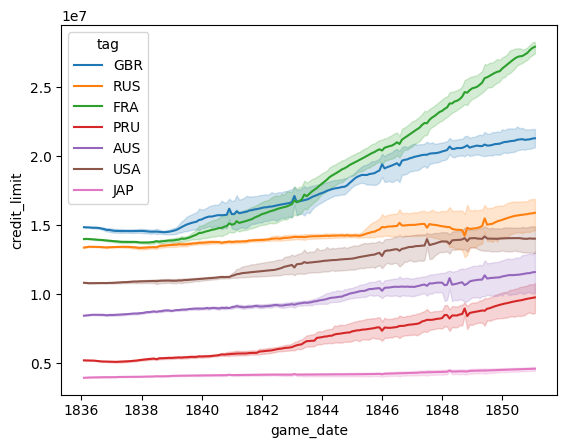

In [14]:

seaborn.lineplot(countries, x='game_date', y='credit_limit', hue='tag')